In [1]:
"""
© 2023. Triad National Security, LLC. All rights reserved.
This program was produced under U.S. Government contract 89233218CNA000001 for Los Alamos
National Laboratory (LANL), which is operated by Triad National Security, LLC for the U.S.
Department of Energy/National Nuclear Security Administration. All rights in the program are.
reserved by Triad National Security, LLC, and the U.S. Department of Energy/National Nuclear
Security Administration. The Government is granted for itself and others acting on its behalf a
nonexclusive, paid-up, irrevocable worldwide license in this material to reproduce, prepare.
derivative works, distribute copies to the public, perform publicly and display publicly, and to permit.
others to do so.
"""

from sys import path
from numpy import array, linspace, logspace, sqrt, exp, log, log10, pi as π
%matplotlib inline
import matplotlib.pyplot as plt

path.append('/Users/smith_sean/Documents/Python')
from pyregress import GPI, SquareExp, LogNormal

Pr0 = 0.71
ε0 = 0.35  # for spheres the void fraction goes from 26% (close pack) to ~40%

While heat-transfer correlation are provided as Re & Pr -> Nu,
the Chilton/Colburn analogy allows us to convert to Re & Sc -> Sh.


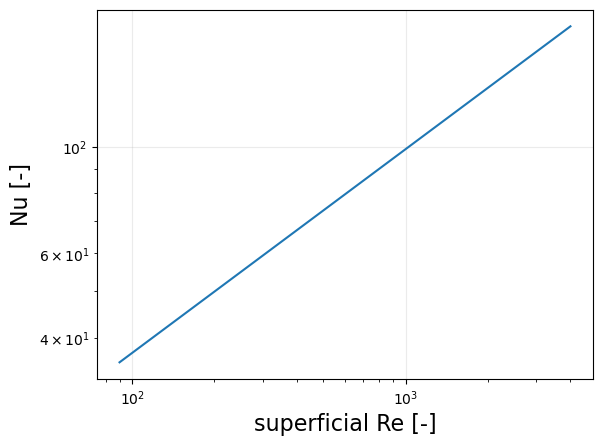

In [2]:
def turb_Nu_text(Re, Pr, ε, c=2.06, n=-0.575):
    """
    Calculate the turbulent Nusselt (or Sherwood) number [-] from the Reynolds & Prandtl (or
    Schmidt) numbers and void fraction (all [-]) for gas flow over a packed bed of spheres using
    the empirical correlation restated in Incropera & DeWitt (and other textbooks).
    Reported range of applicability: Pr approx. 0.7 & 90 <= Re <= 4000.
    Further suggested to multiply by 0.79 for cylinders of aspect ratio one, and 0.71 for cubes.
    """
    Nu = c * Re**(n + 1) * Pr**(1 / 3) / ε
    return Nu
turb_Nu_text.Re_domain = array([90, 4000])

Re_text = logspace(*log10(turb_Nu_text.Re_domain), 200)
Nu_text = turb_Nu_text(Re_text, Pr0, ε0)
plt.loglog(Re_text, Nu_text, label='Textbook Model')
plt.grid(True, alpha=0.25)
plt.xlabel('superficial Re [-]', fontsize=16)
plt.ylabel('Nu [-]', fontsize=16) ;

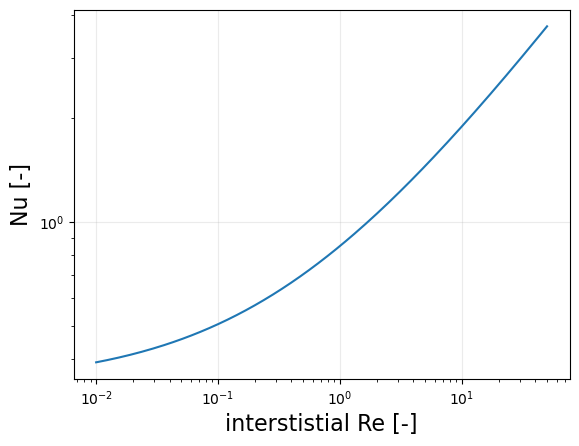

In [3]:
def turb_Nu_finlayson(Re, Pr, ε, c0=0.36, c1=0.58, n1=0.48, c2=0.29, c3=0.028):
    """
    Calculate the turbulent Nusselt (or Sherwood) number [-] from the Reynolds & Prandtl (or
    Schmidt) numbers and void fraction (all [-]) for fixed spherical pellets using the
    empirical correlation proposed by Chang & Finlayson, 1987.
    Reported range of applicability: 7.3e-3 <= Pr <= 1.0e4 & 0.01 <= Re <= 50
    """
    m = c2 + c3 * log10(Re)
    Nu = (c0 + c1 * Re**n1) * Pr**m
    return Nu
turb_Nu_finlayson.Re_domain = array([0.01, 50])

Re_fin = logspace(*log10(turb_Nu_finlayson.Re_domain), 200)
Nu_fin = turb_Nu_finlayson(Re_fin, Pr0, ε0)
Nu_fin_corr = turb_Nu_finlayson(Re_fin / ε0, Pr0, ε0)
plt.loglog(Re_fin, Nu_fin, label='Finlayson, 1987')
plt.grid(True, alpha=0.25)
plt.xlabel('interstistial Re [-]', fontsize=16)
plt.ylabel('Nu [-]', fontsize=16) ;

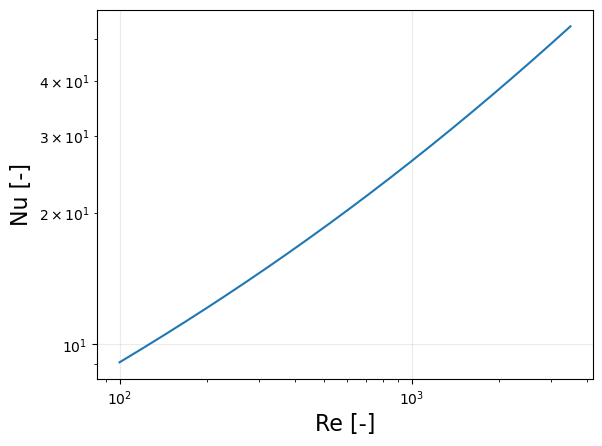

In [4]:
def turb_Nu_Kramers(Re, Pr, ε, c0=1.26, c1=0.054, c2=0.8, n2=0.2):
    """
    Calculate the turbulent Nusselt (or Sherwood) number [-] from the Reynolds & Prandtl (or
    Schmidt) numbers and void fraction (all [-]) for fixed spherical pellets using the
    empirical correlation proposed by Thoenes and Kramers, 1958.
    Reported range of applicability: 100 <= Re <= 3500.
    """
    Nu = c0 * Re**(1/3) * Pr**(1/3) + c1 * Re**0.8 * Pr**0.4 + c2 * Re**n2
    return Nu
turb_Nu_Kramers.Re_domain = array([100, 3500])

Re_tk = logspace(*log10(turb_Nu_Kramers.Re_domain), 200)
Nu_tk = turb_Nu_Kramers(Re_tk, Pr0, ε0)
Nu_tk_corr = turb_Nu_Kramers(Re_tk / ε0, Pr0, ε0)
plt.loglog(Re_tk, Nu_tk, label='Thoenes & Kramers, 1958')
plt.grid(True, alpha=0.25)
plt.xlabel('Re [-]', fontsize=16)
plt.ylabel('Nu [-]', fontsize=16) ;

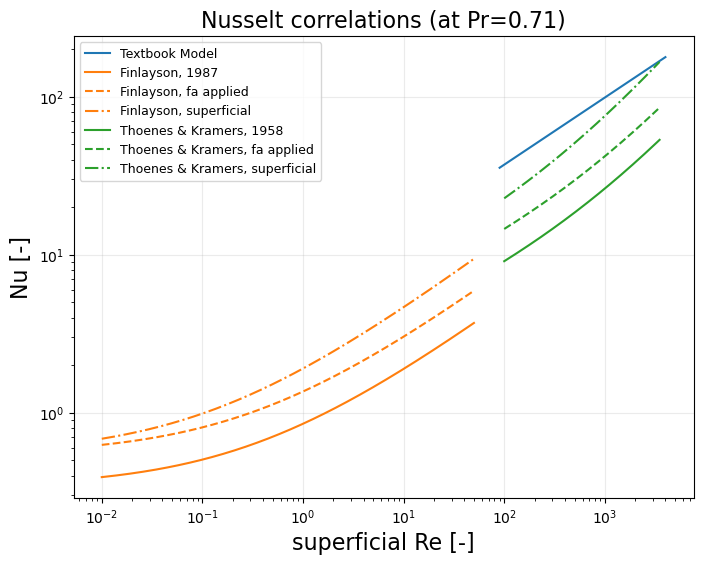

In [5]:
plt.figure(figsize=(8, 6))
plt.loglog(Re_text, Nu_text, linestyle='-', color='tab:blue', label='Textbook Model')
plt.loglog(Re_fin, Nu_fin, linestyle='-', color='tab:orange', label='Finlayson, 1987')
plt.loglog(Re_fin, 1.6 * Nu_fin, linestyle='--', color='tab:orange', label='Finlayson, fa applied')
plt.loglog(Re_fin, 1.6 * Nu_fin_corr, linestyle='-.', color='tab:orange', label='Finlayson, superficial')
plt.loglog(Re_tk, Nu_tk, linestyle='-', color='tab:green', label='Thoenes & Kramers, 1958')
plt.loglog(Re_tk, 1.6 * Nu_tk, linestyle='--', color='tab:green', label='Thoenes & Kramers, fa applied')
plt.loglog(Re_tk, 1.6 * Nu_tk_corr, linestyle='-.', color='tab:green', label='Thoenes & Kramers, superficial')
plt.grid(True, alpha=0.25)
plt.xlabel('superficial Re [-]', fontsize=16)
plt.ylabel('Nu [-]', fontsize=16)
plt.title(f'Nusselt correlations (at Pr={Pr0:.2f})', fontsize=16)
plt.legend(fontsize=9) ;
# plt.xlim(Re[0], Re[-1]) ;

In [6]:
expt_Nu = dict()
# Hilpert et al 1933 (as reproted by Finlayson 1987):
expt_Nu['Hilpert'] = dict(x=array([100.000000,  78.987974,  70.596064,  67.494486,  61.005059,
                                    58.324854,  50.970286,  49.838042,  45.046239,  43.067171,
                                    39.810717,  36.389459,  34.017885,  30.747150,  29.396300,
                                    25.118864,  22.703748,  21.951460,  21.706278,  18.969189,
                                    17.145349,  15.152622,  13.850435,  10.940178,   9.668650,
                                     9.038524,   7.637071,   7.301542,   6.452917,   5.898365,
                                     5.212825,   5.513957,   4.818666,   4.454310,   4.306717,
                                     3.680049,   3.479071,   2.906796,   2.146383]),
                          y=array([  5.274997,   4.641588,   4.470198,   4.370416,   4.115087,
                                     4.023232,   3.816799,   3.759788,   3.620958,   3.513594,
                                     3.435165,   3.283521,   3.186162,   3.115043,   2.977530,
                                     2.803576,   2.700054,   2.659724,   2.659724,   2.542311,
                                     2.448436,   2.305393,   2.237037,   2.043889,   1.953663,
                                     1.924481,   1.771601,   1.745139,   1.693394,   1.606506,
                                     1.547185,   1.570646,   1.501310,   1.467799,   1.435035,
                                     1.361403,   1.341068,   1.272257,   1.145047]),
                          label='Hilpert et al 1933')

# Wilke & Hougen 1945 (as reported by Wakao et al 1979):
expt_Nu['Wilke'] = dict(x=array([ 45.056040,  64.017011,  68.065929,  67.311174,  92.491472,
                                 130.684102, 155.339997, 130.684102, 189.867382, 201.876025,
                                 248.126485, 228.219900, 252.311500]),
                        y=array([ 27.564990,  29.121565,  23.700171,  24.867163,  29.121565,
                                  23.863470,  19.554759,  29.727681,  32.727327,  31.840663,
                                  28.332590,  38.856458,  39.938490]),
                        label='Wilke & Hougen 1945')

# Thoenes & Kramers 1958:
Pr = 6.9  # 0.71 for gases, 6.9 for water
expt_Nu['Thoenes'] = dict(x=array([  7.532818,  31.704329,   6.388062,  33.380276,   5.974290,
                                    17.990099,  29.957810, 258.007962,   7.008701,  25.405146,
                                    47.872872, 597.429073,  19.535644,  94.491229, 235.160650,
                                  1509.979034, 17.2638027,   4.122992,  16.566828, 160.626262,
                                    25.015563,  70.448981, 139.051837, 287.483534,2758.772471,
                                   679.539592,3089.817907, 504.035180,2845.369700,  50.403518,
                                   201.488637,  40.807337, 737.919434,  30.739425, 284.536970,
                                     4.454198, 202.529222,]),
                          y=array([  6.736626,  10.424582,   5.387372,   7.791980,   4.491280,
                                     6.071495,   7.320821,  20.382388,   3.339658,   5.331658,
                                     6.986244,  28.873312,   4.353376,   8.556179,  14.165813,
                                    54.720364,   4.880761,  2.309038,    2.561992,   7.474620,
                                     3.686306,   5.946567,   8.250467,  12.635142,  60.400199,
                                    25.487106,  58.850708,  15.474486,  41.328802,   4.755551,
                                     9.592709,   7.671421,  32.036372,   3.137718,  14.239635,
                                     1.174836,   9.896584]) * Pr**(1/3),
                          label='Thoenes & Kramers 1958')

# Collis & Williams 1959 (as reported by Finlayson 1987):
expt_Nu['Collis'] = dict(x=array([156.719108, 105.776756,  64.529172,  32.523338,  16.764486,
                                   10.342705,   6.452917,   5.832485,   5.097028,   1.793323,
                                    1.309402,   1.196874,   0.713934,   0.504009,   0.465899,
                                    0.440455,   0.430671,   0.328907,   0.248383,   0.217062,
                                    0.185478,   0.111887,   0.085449,   0.076370,   0.059649,
                                    0.052128,   0.046069,   0.040715,   0.039810,   0.035183,
                                    0.035581,   0.022703,   0.019183,   0.016953,   0.012518,
                                    0.012378,   0.010577]),
                         y=array([  6.271704,   5.157251,   4.053620,   2.889244,   2.288111,
                                    1.910054,   1.524075,   1.478885,   1.424278,   1.038340,
                                    0.920560,   0.879922,   0.723564,   0.661091,   0.656135,
                                    0.656135,   0.622468,   0.577348,   0.547724,   0.523545,
                                    0.496682,   0.453798,   0.433765,   0.433765,   0.408423,
                                    0.408423,   0.378818,   0.384562,   0.375978,   0.370362,
                                    0.381679,   0.356687,   0.333331,   0.325890,   0.316227,
                                    0.328352,   0.318616]),
                         label='Collis & Williams 1959')

# Satterfield & Resnick 1954 (as reported by Wakao et al 1979):
expt_Nu['Satterfield'] = dict(x=array([ 15.620847,  19.632617,  22.071185,  24.130514,  28.207409,
                                        27.431948,  27.894628,  31.711052,  35.649883,  40.077956,
                                        42.140272,  42.140272,  45.815976,  50.652453,  59.874198,
                                        69.213961,  74.416750,  81.360127,  79.565792, 104.561176,
                                       104.561176, 111.795970, 127.091417, 133.631237, 138.177024,
                                       149.394338, 152.763419, 164.246592]),
                              y=array([ 17.884841,  14.655612,  16.583718,  14.258556,  16.813035,
                                        15.589886,  14.756592,  15.805460,  14.858268,  19.825159,
                                        17.520188,  16.697983,  21.380599,  16.245593,  22.127401,
                                        19.420945,  20.237787,  20.801346,  22.587945,  29.727681,
                                        34.103832,  33.870458,  35.783097,  32.280951,  28.527807,
                                        29.727681,  32.727327,  29.524253]),
                              label='Satterfield & Resnick 1954')

# Galloway et al 1957 (as reported by Wakao et al 1979):
expt_Nu['Galloway'] = dict(x=array([ 154.476345,  157.960032,  197.423804,  215.844226,  250.908710,
                                     250.908710,  294.939986,  387.594605,  407.539296,  364.538448,
                                     394.131954,  473.745168,  553.785275,  515.067807,  479.057241,
                                     479.057241,  430.906025,  517.947467,  506.524532,  515.067807,
                                     619.109623,  626.051657,  615.667526,  612.244566,  669.369407,
                                     707.748462,  696.009251,  855.467253,  940.514764,  855.467253,
                                     841.277874,  748.328024,  727.755459,  822.724134,  836.600577,
                                    1093.303957,  956.377917,  924.914727,  935.285733,  977.945764,
                                    1087.225456, 1087.225456, 1242.885131]),
                           y=array([  11.927261,   16.697983,   17.045523,   19.961758,   17.762454,
                                      20.801346,   22.743581,   25.735747,   25.913071,   33.408490,
                                      36.029649,   32.280951,   27.376362,   33.638681,   37.545049,
                                      37.545049,   48.073810,   40.213674,   44.576438,   51.490797,
                                      53.656490,   32.503372,   41.050653,   43.968449,   50.788502,
                                      48.405048,   38.590562,   36.527862,   43.968449,   47.093636,
                                      53.289317,   57.077012,   60.715587,   60.300108,   63.705209,
                                      50.788502,   57.866264,   64.586115,   60.715587,   84.419223,
                                      81.570066,   81.570066,   76.156984]),
                           label='Galloway et al 1957')

# De Acetis & Thodos 1960 (as reported by Wakao et al 1979):
expt_Nu['De Acetis'] = dict(x=array([  32.426187,   90.957344,   90.957344,  157.960032,
                                      291.669516,  563.125672,  765.204014, 2170.509761]),
                            y=array([  22.743581,   22.900288,   26.452407,   31.191465,
                                       40.769742,   55.150657,   67.766322,  103.730046]),
                            label='De Acetis & Thodos 1960')

# McConnachie & Thodos 1963 (as reported by Wakao et al 1979):
expt_Nu['McConnachie'] = dict(x=array([ 146.099560,  294.939986,  400.779564,  967.101718,
                                       1519.140922]),
                              y=array([  19.961758,   37.803742,   41.618295,   70.616560,
                                         89.186313]),
                              label='McConnachie & Thodos 1963')

# Sen Gupta & Thodos 1963/1964 (as reported by Wakao et al 1979):
expt_Nu['Sen Gupta'] = dict(x=array([6191.096230, 5726.236084, 5150.678076, 5150.678076,
                                     4737.451688, 4333.151505, 2041.396476, 1919.963525,
                                     1775.802541, 1642.465923, 1405.075812, 1397.263937,
                                     1270.914172, 1081.180751,  841.277874]),
                            y=array([ 228.479331,  249.812585,  243.044548,  241.381386,
                                      214.786980,  167.745966,  118.185613,  114.196837,
                                      109.587603,  117.376864,  114.196837,  105.889011,
                                      108.092911,   98.185580,   80.457512]),
                            label='Sen Gupta & Thodos 1963/1964')

# Malling & Thados 1967 (as reported by Wakao et al 1979):
expt_Nu['Malling'] = dict(x=array([8698.959569, 5507.063660, 4711.112624, 4052.734785, 2551.406520,
                                   1136.815725,  559.994832,  288.435310,  187.762019]),
                          y=array([ 286.586983,  203.306420,  184.672228,  179.669004,  131.910185,
                                     89.800823,   61.979279,   46.451314,   36.779545]),
                          label='Malling & Thados 1967')

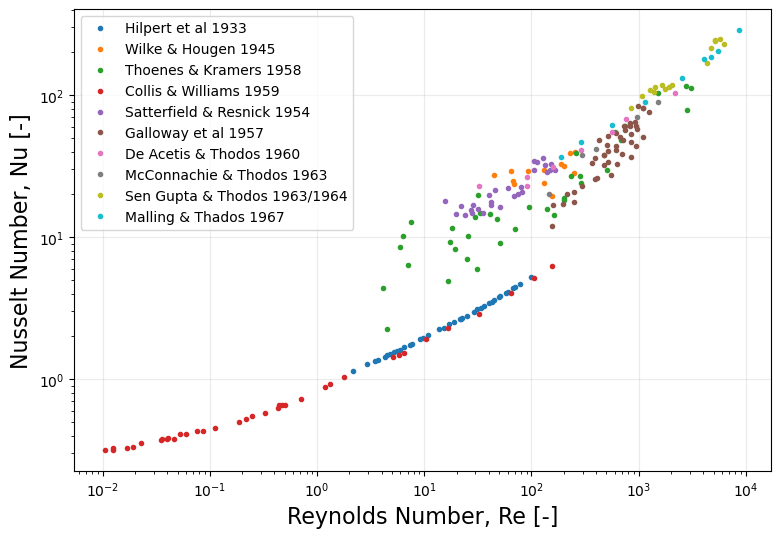

In [7]:
plt.figure(figsize=(9, 6))
for auth, expt in expt_Nu.items():
    plt.loglog(expt['x'], expt['y'], 'o', markersize=3, label=expt['label'])
plt.xlabel('Reynolds Number, Re [-]', fontsize=16)
plt.ylabel('Nusselt Number, Nu [-]', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.25)

Upon looking at this plot, it should be obvious that something is going on between the grouping of Hilpert et al 1993 and Collis & Williams 1959 versus the group of all the remaining data. In deed there is a difference in how the studies were performed — the former two (along with the corresponding Finlayson model) were all performed on individual/singular pellets while all the remaining studies were on packed beds. It should be clear that experiments on individual pellets are much more repeatable — particularly for low Reynolds' number — but may not be entirely representative of the behavior in packed beds.  
The scientific community has identified two major causes for the scatter in the packed-bed studies:
- Channeling, as illustrated in the Suzuki 1967 paper, and
- Inlet development & Biot-number effect, as described in Li & Finlayson 1977.